In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r'C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data_Used\Historic_Econ.csv', parse_dates=['Date'])

# Set the Date column as index just temporarily for resampling
df_resampled = df.set_index('Date').resample('MS').interpolate(method='linear')

# Reset index so Date is a normal column again
df_monthly = df_resampled.reset_index()

# Format the date column exactly as in original (YYYY-MM-DD)
df_monthly['Date'] = df_monthly['Date'].dt.strftime('%Y-%m-%d')

# Save to new CSV
df_monthly.to_csv(r'C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data_Used\Historic_Econ_monthly.csv', index=False)

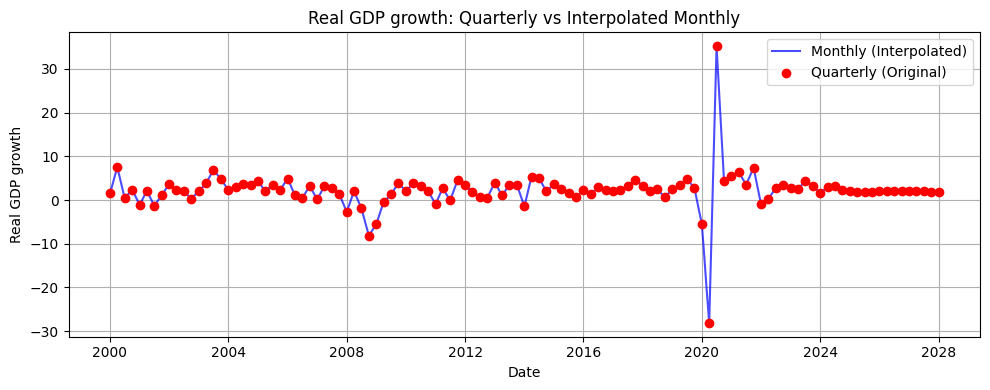

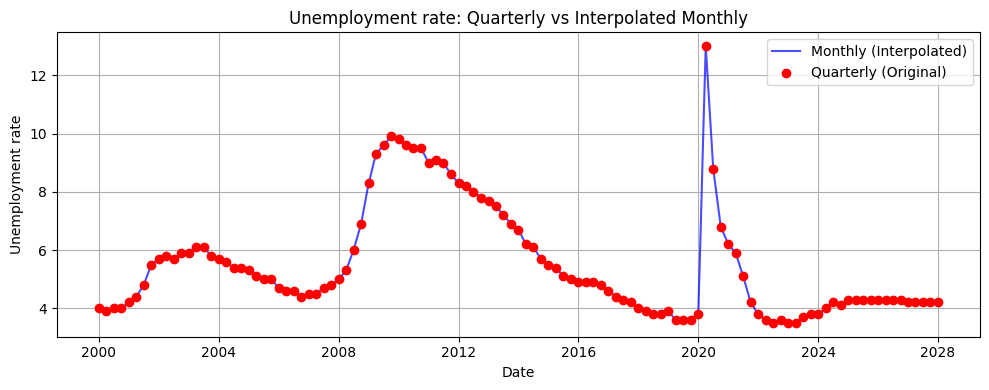

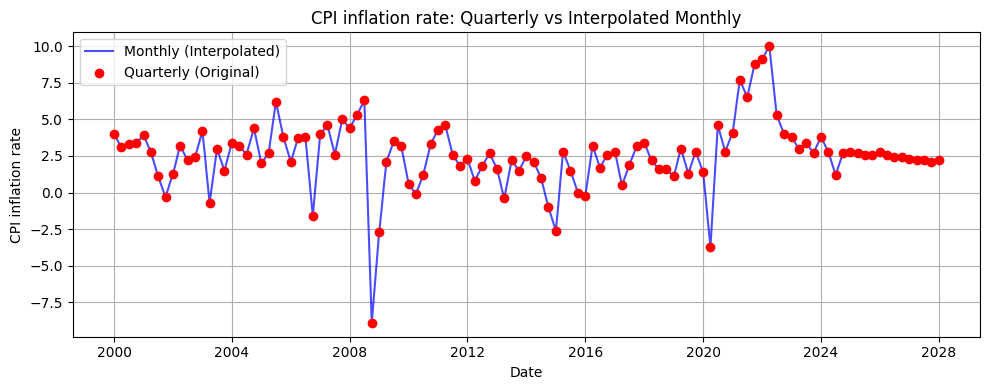

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSVs
df_quarterly = pd.read_csv(r'C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data_Used\Fannie, Baseline Domestic.csv', parse_dates=['Date'])
df_monthly = pd.read_csv(r'C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data_Used\Fannie_monthly, Baseline Domestic.csv', parse_dates=['Date'])

# Choose a few columns to compare
columns_to_plot = ['Real GDP growth', 'Unemployment rate', 'CPI inflation rate']

# Plot each selected column
for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    plt.plot(df_monthly['Date'], df_monthly[col], label='Monthly (Interpolated)', color='blue', alpha=0.7)
    plt.scatter(df_quarterly['Date'], df_quarterly[col], label='Quarterly (Original)', color='red', zorder=5)
    plt.title(f'{col}: Quarterly vs Interpolated Monthly')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()